In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2)

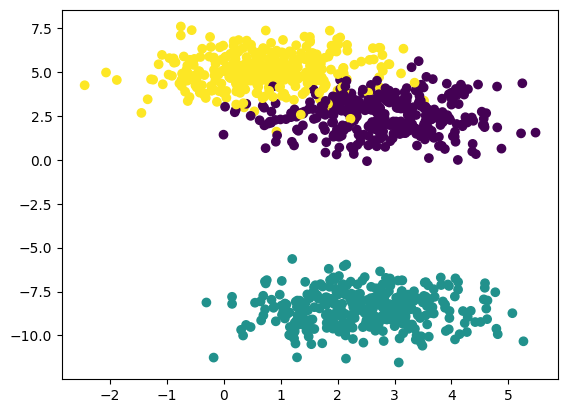

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
## Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [6]:
from sklearn.cluster import KMeans

In [7]:
## Elbow method to find the K value

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[1600.0000000000011,
 808.3300748067356,
 386.46026551926576,
 293.62111066427656,
 255.23752816779876,
 152.26078546568456,
 134.31157337308403,
 104.68975024931873,
 92.20272105514886,
 79.20098487464585]

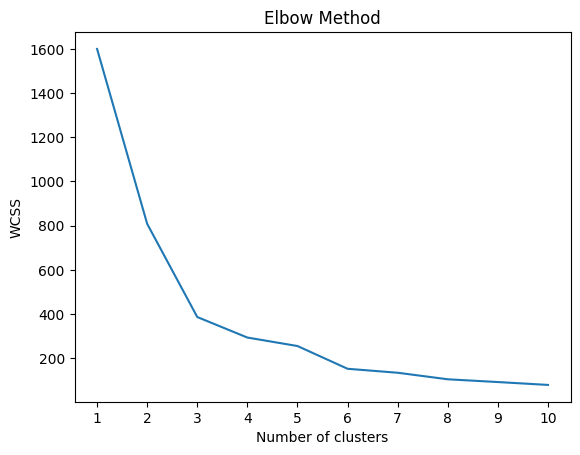

In [9]:
## Elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0,
       1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1,
       2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2,
       0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1,
       1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,

In [11]:
y_pred = kmeans.predict(X_test_scaled)

In [12]:
y_pred

array([1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 1], dtype=int32)

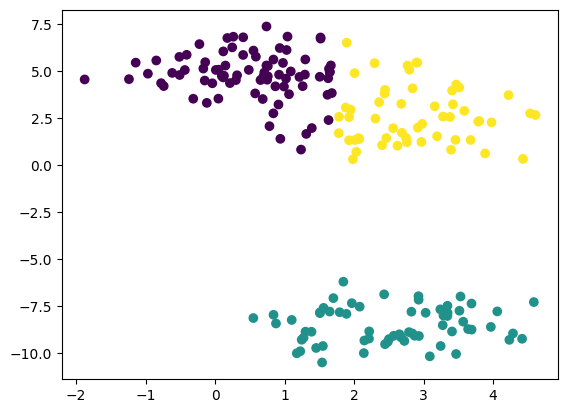

In [13]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [17]:
## Validating the K Value
## 1. KneeLocator
## 2. Silhouette Scoring

In [18]:
## Kneelocation
!pip install kneed

In [19]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
kl.elbow


3

In [20]:
## Silhouette Scoring

from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [21]:
silhouette_coefficients

[0.5174729336389096,
 0.5458327164154734,
 0.5172012468186309,
 0.4813958856579461,
 0.45342824011347366,
 0.43592442557537775,
 0.42870086804353863,
 0.4223643134082837,
 0.4051478780577453]

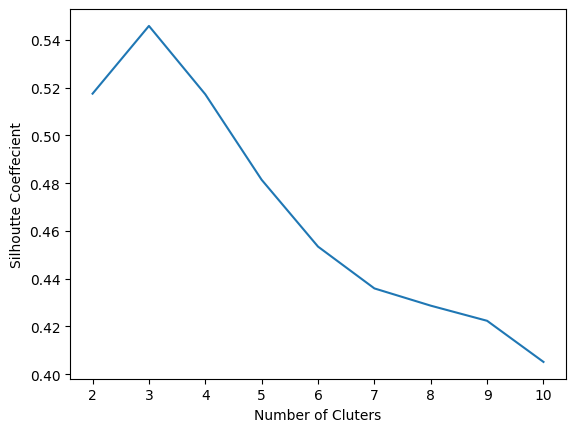

In [22]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()